<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/LQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from control import lqr

In [2]:
# System matrices
A = np.array([[0, 1],
              [-1, 0]])
B = np.array([[0],
              [1]])
Q = np.array([[1, 0],
              [0, 1]])  # State cost weighting
R = np.array([[1]])    # Control effort cost weighting

# Compute the LQR controller gain
K, S, E = lqr(A, B, Q, R)

# Simulation parameters
T = 10  # total time
dt = 0.01  # timestep
t = np.linspace(0, T, int(T/dt) + 1)
x = np.zeros((2, len(t)))  # state initialization
u = np.zeros(len(t))  # control input initialization

# Simulate the system
for i in range(1, len(t)):
    u[i-1] = -K @ x[:, i-1]
    x[:, i] = x[:, i-1] + (A @ x[:, i-1] + B * u[i-1]) * dt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 2.3 MB/s eta 0:00:00


<ipython-input-2-3903aa312cbc>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[i-1] = -K @ x[:, i-1]


ValueError: could not broadcast input array from shape (2,2) into shape (2,)

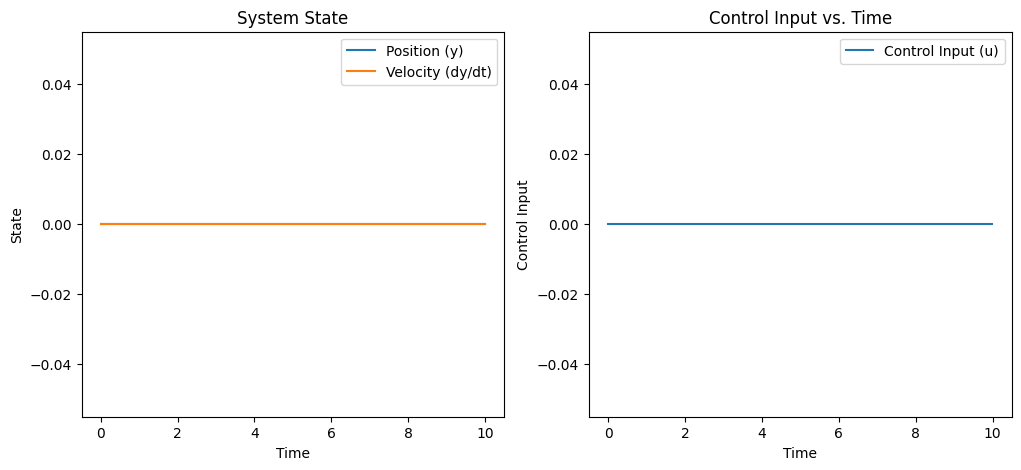

In [4]:
# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(t, x[0, :], label='Position (y)')
plt.plot(t, x[1, :], label='Velocity (dy/dt)')
plt.title('System State')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()

plt.subplot(122)
plt.plot(t[:-1], u[:-1], label='Control Input (u)')
plt.title('Control Input vs. Time')
plt.xlabel('Time')
plt.ylabel('Control Input')
plt.legend()

#plt.tight()
plt.show()